<h1 align="center">Machine Learning: Clustering</h1>

### 1. What is Clustering?
Clustering is a general problem that we need to divide the whole dataset into several small groups (clusters) so that the points within each group are quite similar in certain ways. There are lots of daily examples around us:

1. Market Segmentation: Divide a broad business market into small segments so within each segments the most profitable characteristic could be discovered. After knowing this, they could select some of segments to become target markets.

2. Recommendation System: The system could collect your search history and then recommend similar products/videos/articles to you on the main page.

3. Image Segmentation: This is the process when dividing the whole all pixels into different non-overlapping sub groups and the union of them is the whole image.

Although it sounds very similar to the classification (perhaps due to the grouping operation), the main difference is that:

***Classification problem is to assign points into a given number of predefined categories but the clustering is to identify the similarities between points and group based on them (no given number, no predifined categories).***


By studying the clustering algorithm, we will also understand more about the unsupervised learning, a specific type of algorithm in the machine learining.

### 2. What is Unsupervised Learning?
Unlike supervised learning algorithms where each data point has "features" and "labels" and could be mapped, unsupervised learning algorithm always handle unlabel data.

This means that supervised learning algorithms often try to use "features" to get a very clear "answer" but unsupervised learning algorithms tend to discover the deeply hidden patterns within the dataset, like the probability distribution, density estimation and so on.

However, this doesn't necessarily mean that the supervised learning algorithms could always produce better results with higher accuracy, ***it is more about the real situation (what kind of data you could obtain, what kind of problem you want to sovle)***.

Talking about the unsupervised learning, here we must introduce a very famous clustering algorithm here: K-Means Algorithm. Although it was firstly proposed in 1957, it is still very powerful and very efficient in lots of situations.

### 3. K-Means Algorithm: Introduction
Unlike traditional machine learning algorithm with classical pipeline, the K-Means algorithm is more like a iterative algorithm, which keeps repeating certain steps until the end condition is met.

A classical K-Means algorithm contains the following steps:

1. Choose K.

2. Randomly initialise the starting representative point for each cluster.

3. Assign each data point to the corresponding cluster depending on the distance.

4. For every cluster, update the new representative point.

5. Repeat step 3 and 4 until the end condition is met.

No worry if you can't understand all of these for now, we will implement the whole algorithm step by step after we finish the preparation!

### 4. Preparation: Loss Function (Dissimilarity)
As we mentioned before, the core idea of clustering is to group some points that are similar in some ways. This raises the question: how could we tell whether 2 points are similar or not?

In machine learning, the ***object*** in real life are represented by a ***high-dimentional point*** in the feature space, in which each dimention represents a distinct feature of the object.

For example, if we want to represent a ***car*** in machine learning problem, we could first choose **features** we are interested and construct the ***point*** using those **features**. If we are interested in **the number of wheels** and **the number of passengers**, we could construct a ***point*** like ***(the number of wheels, the number of passengers)***. So in this way, a normal ***car*** could be represented as ***(4,4)*** as it has 4 wheels and usually could take 4 passengers.

If the distance between 2 points is very small, we could say those points are very similar as their features are close to each other.

There are many ways to measure the distance, but all of them obey the following important rules:

1. The result is non-negative.

2. The distance is symmetric: $Distance(A,B) = Distance (B,A)$

3. Triangular Inequality: $Distance(A,C) \leqslant Distance(A,B)+Distance(B,C)$ for any possible A, B, C

There are lots of distance measurement, but we commonly use Manhattan distance (L1 norm), Euclidean distance (L2 norm), chessboard distance and so on. Within this tutorial, we will use Euclidean distance and it is always a good choice to try first.

#### 4.1 Euclidean Distance
Within 2-D feature space, the euclidean distance between $(x_1, x_2)$ and $(y_1, y_2)$ is: $d=\sqrt{(x_1-y_1)^2+(x_2-y_2)^2}$

In [2]:
def euclidean2D(pointX, pointY):
    '''
        Return the euclidean distance between the point X and the point Y
    in 2-D feature space
    
    Argument:
        pointX: tuple, a point with 2 features
        pointY: tuple, a point with 2 features
    
    Return:
        result: float, the euclidean distance between 2 points
    '''
    return ((pointX[0]-pointY[0])**2+(pointX[1]-pointY[1])**2)**0.5

pointX=(1, 2)
pointY=(3, 4)
print(f"The euclidean distance between 2 points is: {euclidean2D(pointX, pointY)}")

The euclidean distance between 2 points is: 2.8284271247461903


This idea could be easily expanded to N-D feature space and the distance between $(x_1...x_N)$ and $(y_1...y_N)$ is: $d=\sqrt{\sum_{i=1}^N (x_i-y_i)^2}$

In [3]:
def euclideanND(pointX, pointY):
    '''
        Return the euclidean distance between the point X and the point Y
    in N-D feature space

    Argument:
        pointX: tuple, a point with N features
        pointY: tuple, a point with N features
    
    Return:
        result: float, the euclidean distance between 2 points
    '''
    #Find all square of difference as a list
    squareDifference=[(pointX[i]-pointY[i])**2 for i in range(len(pointX))]
    #Sum all square of difference and return the square root of the result
    return sum(squareDifference)**0.5


pointX=(1, 2, 3, 4, 5)
pointY=(6, 7, 8, 9, 10)
print(f"The euclidean distance between 2 points is: {euclideanND(pointX, pointY)}")

# This could also be calculated by using numpy to find the norm 2 of the difference array
# The function used is: np.linalg.norm(inputArray, order of the norm)
# For more information, please check: https://numpy.org/doc/stable/reference/generated/numpy.linalg.norm.html
import numpy as np
print(f"The euclidean distance between 2 points by numpy is: {np.linalg.norm(np.array(pointX)-np.array(pointY), ord=2)}")

The euclidean distance between 2 points is: 11.180339887498949
The euclidean distance between 2 points by numpy is: 11.180339887498949


### 5. K-Means Algorithm from Scratch
#### 5.1 Choose K (how many clusters in total do we want?)
It is always a good idea to start from understanding the data. The biggest reason why the machine learning and even deep learning could have such a fantastic performance nowadays is that ***we could access to lots of data easily!***

The easiest way we could understand the data is by data visualisation. Here our "toy" dataset could be found in the **Dataset** folder and we could write some codes to read those data and plot it.

The total number of points in the dataset is 90 and each point has 2 features.


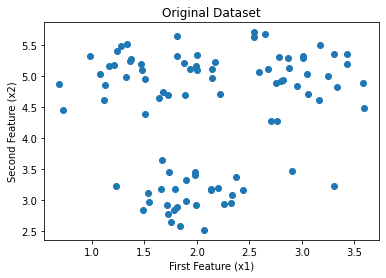

The first point in the dataset is [1.54364004 2.97058974]
The first feature of the first point is 1.5436400415855356
The second feature of the first point is 2.9705897391425653


In [4]:
import pandas as pd
import matplotlib.pyplot as plt

def readCSV(path="../Dataset/dataset.csv"):
    '''
        Read the csv file containing the dataset using the given path
    and return it as a numpy array

    Arugument:
        path: string, the file path to find the csv file
    
    Return:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
    '''
    dataFrame=pd.read_csv(path)
    # Shuffle the dataset :)
    dataFrame.sample(frac=1)
    return dataFrame.values

dataset=readCSV()
print(f"The total number of points in the dataset is {dataset.shape[0]} and each point has {dataset.shape[1]} features.")

# Plot all points on a scatter plot
plt.scatter(dataset[:, 0], dataset[:, 1])
plt.title("Original Dataset")
plt.xlabel("First Feature (x1)")
plt.ylabel("Second Feature (x2)")
plt.show()

# Each point within the dataset could be accessed by using the corresponding index
print(f"The first point in the dataset is {dataset[0]}")

# The feature of each point could also be accessed by index
print(f"The first feature of the first point is {dataset[0][0]}")
print(f"The second feature of the first point is {dataset[0][1]}")

It could be seen from the plot that the whole dataset could be roughly divided into 3 clusters. So in this case we choose K=3.

There is no strict rule for choosing K at this moment. But we do have some methods to optimize our choice in the later steps.

#### 5.2 Initialize a representative point for each cluster
Just like chooing K, there is no strict rule at this stage. Personally, I prefer to choose K random points from the dataset to start with.

In [5]:
import random

def randomChoose(dataset, K):
    '''
        Randomly choose K points from the dataset
    and return them as a numpy array

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        K: int, the total number of clusters
    
    Return:
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    '''
    # random.sample() function could randomly choose k elements from the given sequence and return them as a list
    # For more information, please check: https://docs.python.org/3/library/random.html
    
    # Randomly choose K different indexes from available choices
    indexList=[i for i in range(len(dataset))]
    indexChosen=random.sample(indexList, K)

    # Choose corresponding points using those indexes
    representativePoint=[dataset[index] for index in indexChosen]
    return np.array(representativePoint)

representativePoint=randomChoose(dataset, 3)
print(f"Is the first representative point in the dataset? {representativePoint[0] in dataset[:]}")
print(f"Is the second representative point in the dataset? {representativePoint[1] in dataset[:]}")
print(f"Is the third representative point in the dataset? {representativePoint[2] in dataset[:]}")

Is the first representative point in the dataset? True
Is the second representative point in the dataset? True
Is the third representative point in the dataset? True


#### 5.3 Assign each point to the corresponding cluster depending on the distance
To correctly assign the point to the cluster, we compare the distance between the point and every representative point. After that we choose the one with the minimum distance.

In [6]:
def assignPoint(point, representativePoint):
    '''
        Return the index of the cluster where the given point
    should be assigned to by finding the index of representative
    point with the minimum distance
    
    Argument:
        point: np.ndarray, numpy array with shape (1, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    
    Return:
        label: int, the index of the cluster where the point should be assigned to
    '''
    # Find the distance between the given point and every representative point
    distance=[euclideanND(point, representativePoint[i]) for i in range(representativePoint.shape[0])]
    # Return the index of the representative point with the minimum distance
    return np.argmin(distance)

def assignDataset(dataset, representativePoint):
    '''
        Return a numpy array containing all cluster index for every point
    in the dataset
    
    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    
    Return:
        label: np.ndarray, numpy array with shape (the number of points, 1)   
    '''
    # Find the corresponding cluster for every point in the dataset
    label=[assignPoint(dataset[i], representativePoint) for i in range(dataset.shape[0])]
    return np.array(label)

def formCluster(dataset, label, K):
    '''
        Return a dictionary recording the group of points for
    each cluster

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        label: np.ndarray, numpy array with shape (the number of points, 1)
        K: int, the total number of clusters
    
    Return:
        cluster: dictionary, key=the index of the cluster, value=numpy array with shape (the number of points within the cluster, the number of features for each point)
    '''
    # Initialise a dictonary so that the order of the cluster is kept. 
    # This is very important as we need to make sure each cluster matches the right group of points so the representative point could be accurately calculated later.
    cluster={}
    for i in range(K):
        cluster[i]=[]

    # Group points that have the same label
    for i in range(dataset.shape[0]):
        cluster[label[i]].append(dataset[i])
    
    # Convert all clusters in to numpy array
    for key, value in cluster.items():
        cluster[key]=np.array(value)
    
    return cluster

label=assignDataset(dataset, representativePoint)
print(f"The first point has label {label[0]}")

cluster=formCluster(dataset, label, 3)
for key, value in cluster.items():
    print(f"There are {value.shape[0]} points within the cluster {key}")

The first point has label 2
There are 15 points within the cluster 0
There are 42 points within the cluster 1
There are 33 points within the cluster 2


#### 5.4 Update the representative point for each cluster
The name "K-Means" comes from the fact that we use the mean point (equivalent to the centroid) of each cluster as the representative point.

The centroid of a cluster could be found by: $\frac{1}{|C_i|}\sum_{x\in{C_i}} x$

1. $C_i$ means an arbitrary cluster of points.

2. $x\in{C_i}$ means x is a point within teh cluster $C_i$.

3. $|C_i|$ means the number of points in the cluster $C_i$.

In [7]:
def updateRepresentativePoint(cluster):
    '''
        Return representative points for all clusters as
    a numpy array by finding the mean point (centroid) of
    each cluster
    
    Argument:
        cluster: dictionary, key=the index of the cluster, value=numpy array with shape (the number of points within the cluster, the number of features for each point)
    
    Return:
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
    '''
    # Find the mean point of each cluster
    representativePoint=[np.mean(value,0) for value in cluster.values()]
    return np.array(representativePoint)

newRepresentativePoint=updateRepresentativePoint(cluster)
print(f"The original/new first representative point is {representativePoint[0]}/{newRepresentativePoint[0]}")
print(f"The original/new second representative point is {representativePoint[1]}/{newRepresentativePoint[1]}")
print(f"The original/new third representative point is {representativePoint[2]}/{newRepresentativePoint[2]}")

The original/new first representative point is [1.63719024 4.63757293]/[1.29268193 4.83665492]
The original/new second representative point is [1.93885817 5.10529735]/[2.46054724 5.18293205]
The original/new third representative point is [2.37542126 3.37770971]/[2.07904456 3.20046779]


#### 5.5 Plot the cluster and representative point and calculate loss
We could plot cluters using different colors and the corresponding representative point with a larger marker "+".

The loss of the cluster is defined as the sum of the distance between the point and its corresponding representative point.

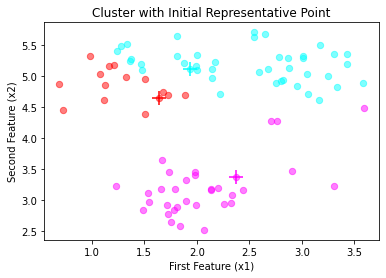

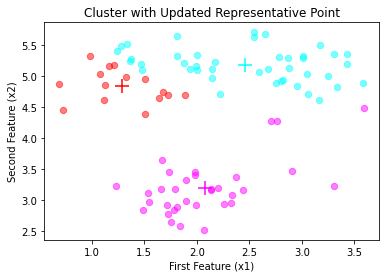

The initial loss is 63.367276840271906


In [8]:
def plotKMeans(cluster, representativePoint, name):
    '''
        Plot the cluster using different colours and the representative
    point as a "+"


    Argument:
        cluster: dictionary, key=the index of the cluster, value=numpy array with shape (the number of points within the cluster, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point) 
        name: string, the name of the plot
    '''

    colorList=["red", "cyan", "magenta", "blue", "orange", "purple", "black"]
    
    for i in range(representativePoint.shape[0]):
        # Plot points in the cluster with the corresponding color
        plt.scatter(cluster[i][:,0], cluster[i][:,1], c=colorList[i], s=40, alpha=0.5)
        # Plot the representative point with the marker "x"
        plt.scatter(representativePoint[i][0], representativePoint[i][1], c=colorList[i], marker="+", s=200)
    
    plt.title(name)
    plt.xlabel("First Feature (x1)")
    plt.ylabel("Second Feature (x2)")
    plt.show()

def calculateLoss(dataset, representativePoint, label):
    '''
        Calculate the overall loss of the cluster by finding
    the sum of distance between the point and its corresponding
    representative point

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
        label: np.ndarray, numpy array with shape (the number of points, 1)

    Return:
        loss: float, the sum of distance between point and its corresponding representative point
    '''
    loss=[euclideanND(dataset[i], representativePoint[label[i]]) for i in range(dataset.shape[0])]
    return sum(loss)

plotKMeans(cluster, representativePoint, "Cluster with Initial Representative Point")
plotKMeans(cluster, newRepresentativePoint, "Cluster with Updated Representative Point")
print(f"The initial loss is {calculateLoss(dataset, representativePoint, label)}")

Until now, we have completed all required components for the K-Means algorithm. We could implement the full process now!

#### 5.6 Final Implementation

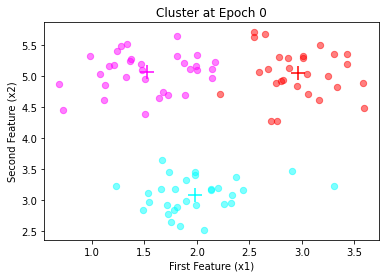

The loss at Epoch 0 is: 40.18827885406244


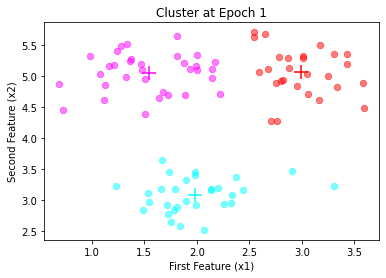

The loss at Epoch 1 is: 40.17516664833395


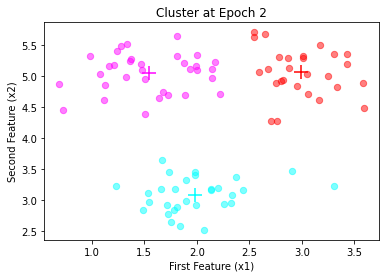

The loss at Epoch 2 is: 40.17516664833395


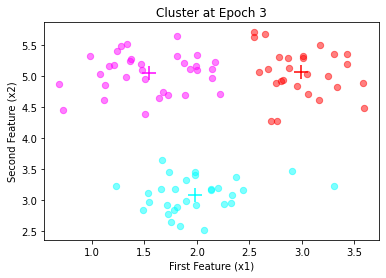

The loss at Epoch 3 is: 40.17516664833395


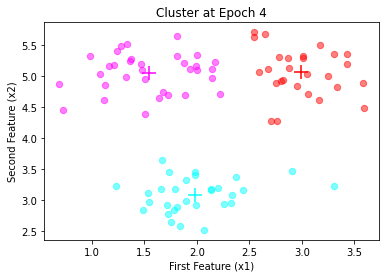

The loss at Epoch 4 is: 40.17516664833395


In [9]:
def KMeans(dataset, K, epoch, plot, reportLoss):
    '''
        Use K-Means algorithm to cluster the dataset
    and return the label for all points

        The algorithm contains the following steps:
        1. Randomly choose K points as representative points
        2. Assign every point to its corresponding cluster depending on the distance
        3. Update representative points by finding the mean point (centroid) of each cluster
        4. Repeat step 2 and 3 until reaching the maximum epoch

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        K: int, the total number of clusters
        epoch: int, the maximum number to repeat the calculation
        plot: boolean, True if plotting the cluster for each epoch
        reportLoss: boolean, True if reporting the loss for each epoch

    Return:
        result: dictionary, contains the following:
        1. label: np.ndarray, numpy array with shape (the number of points, 1)
        2. loss: float, the sum of distance between point and its corresponding representative point
        3. representativePoint: np.ndarray, numpy array with shape (the number of clusters, the number of features for each point)
        4. cluster: dictionary, key=the index of the cluster, value=numpy array with shape (the number of points within the cluster, the number of features for each point)
    '''
    # Randomly choose K points as representative points
    representativePoint=randomChoose(dataset, K)

    # Repeat the process until reaching the maximum epoch
    for i in range(epoch):
        # Assign every point to its corresponding cluster
        label=assignDataset(dataset, representativePoint)
        cluster=formCluster(dataset, label, K)
        # Update representative points
        representativePoint=updateRepresentativePoint(cluster)
        
        # Plot the current cluster if required
        if plot:
            plotKMeans(cluster, representativePoint, f"Cluster at Epoch {i}")
        
        # Report loss if required
        loss=calculateLoss(dataset, representativePoint, label)
        if reportLoss:
            print(f"The loss at Epoch {i} is: {loss}")
    
    return {"label":label, "loss":loss, "representativePoint":representativePoint, "cluster":cluster}

dataset=readCSV()
result=KMeans(dataset, K=3, epoch=5, plot=True, reportLoss=True)

### 6. K-Means Algorithm using Sklearn
Scikit-learn is a popular API for machine learning in Python. We could easily build the K-Means algorithm using it.

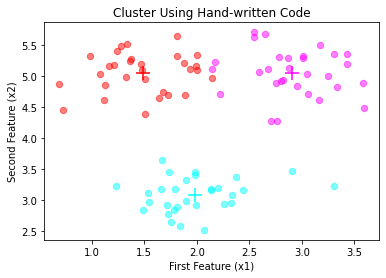

The loss from hand-written code is:  40.36151759749722


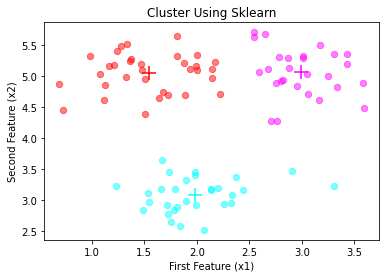

The loss from sklearn is: 40.17516664833395


In [15]:
import sklearn.cluster as cluster

dataset=readCSV()

# Result from hand-written code
result=KMeans(dataset, K=3, epoch=5, plot=False, reportLoss=False)

# Result from sklearn
# For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score
# Initialise a K-Means model using sklearn
model=cluster.KMeans(n_clusters=3, init="random")
# Fit the model using the dataset
model.fit(dataset)

# Manually form the cluster and calculate the loss using results by sklearn
lossSklearn=calculateLoss(dataset, model.cluster_centers_, model.labels_)
clusterSklean=formCluster(dataset, model.labels_, K=3)

# Compare results
plotKMeans(result["cluster"], result["representativePoint"], "Cluster Using Hand-written Code")
print("The loss from hand-written code is: ", result["loss"])
plotKMeans(clusterSklean, model.cluster_centers_, "Cluster Using Sklearn")
print(f"The loss from sklearn is: {lossSklearn}")

### 7. Further Analysis
Although the K-Means algorithm could give us a overall good performance in lots of situations, there are still some limitations:

1. Different K choice will significantly affect the final performance and we have to choose K manually.

2. Different initial representative point will give a different result. (You could try this by yourself by running the above cell for several times!)

3. The calculation of mean is strongly influenced by the outliers so the performance will dramatically drop if there are some outliers within the dataset.

4. This algorithm could only assign every point to exactly one cluster, which is not suitable for multi-clustering problem.

5. Other...

To further improve the performance of the algorithm, we will introduce some common methods here.

#### 7.1 How to choose a better K?
There is a very simple method called ***"elbow" method: we try lots of K choices and plot the loss (boring but efficient)***.

After plotting the loss, we choose the "elbow" of the plot as our K.

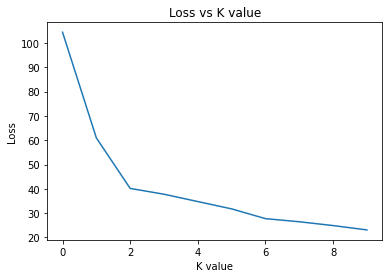

In [11]:
def elbow(dataset, epoch, maxK):
    '''
        Try different K values and plot the performance
    for each value

    Argument:
        dataset: np.ndarray, numpy array with shape (the number of points, the number of features for each point)
        epoch: int, the maximum number to repeat the calculation for each K choice
        maxK: int, the maximum K it would reach 
    '''
    # Run K-Means algorithm and record the loss for every K until reaching the maximum value
    loss=[KMeans(dataset, K=k, epoch=epoch, plot=False, reportLoss=False)["loss"] for k in range(1, maxK+1)]
    plt.plot(loss)
    plt.title("Loss vs K value")
    plt.xlabel("K value")
    plt.ylabel("Loss")
    plt.show()

elbow(dataset, epoch=5, maxK=10)

From the plot we could see that, the "elbow" is at K=2.

This means that K=2 might be a good choice, but this doesn't mean you must choose K=2. There are still many other factors you have to consider when making the decision.

#### 7.2 How to initialise representative points?
As you have observed, different initialisations could give different final results.

But you might also notice that: when you run the comparative experiment, the result from sklean didn't change at all.

This is because the sklearn algorithm had run the calculation for serveral times and only return the best one.

This means that ***running the algorithm for several times and only choose the best one with the lowest loss could improve the performance.***

The only drawback is that it would take really long time if the dataset is very large.

Besides this, there is an advanced method to initialise the algorithm: ***K-Means++.***

##### 7.2.1 K-Means++ Algorithm
The core idea of K-Means++ is that: the representative points should be separated within the dataset as much as possible.

This algorithm has the following steps:
1. Randomly choose 1 point from the dataset as the first representative point.

2. Find the shortest distance between every point and its closest representative point we have chosen.

3. This distance determines the probability of being chosen as a representative point: the larger the distance is, the larger the probablity being chosen is.

4. Repeat until choosing K points.

5. The rest is the same as the K-Means algorithm.

We strongly encourage you to implement this algorithm from scratch by yourself.

By using the scikit-learn API, this could be easilly implemented.

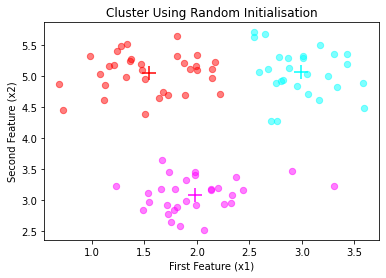

The loss of native K-Means is: 40.17516664833395


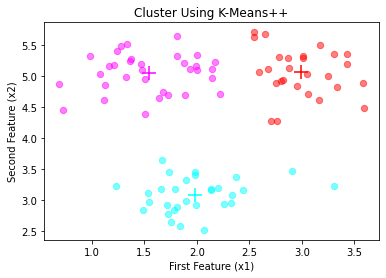

The loss of K-Means++ is: 40.17516664833395


In [12]:
import sklearn.cluster as cluster

dataset=readCSV()

# Result of random initialisation from sklearn 
# For more information, please check: https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans.score
randomModel=cluster.KMeans(n_clusters=3, init="random")
randomModel.fit(dataset)

randomLoss=calculateLoss(dataset, randomModel.cluster_centers_, randomModel.labels_)
randomCluster=formCluster(dataset, randomModel.labels_, K=3)

#Result of K-Means++ from sklearn
plusModel=cluster.KMeans(n_clusters=3, init="k-means++")
plusModel.fit(dataset)

plusLoss=calculateLoss(dataset, plusModel.cluster_centers_, plusModel.labels_)
plusCluster=formCluster(dataset, plusModel.labels_, K=3)

# Compare results
plotKMeans(randomCluster, randomModel.cluster_centers_, "Cluster Using Random Initialisation")
print(f"The loss of native K-Means is: {randomLoss}")
plotKMeans(plusCluster, plusModel.cluster_centers_, "Cluster Using K-Means++")
print(f"The loss of K-Means++ is: {plusLoss}")

The reason why there is no difference here is that the dataset is too small and too easy for native K-Means algorithm (The algorithm converges in 5 epochs).

The difference would be more obvious when dealing with larger and more complex dataset.

#### 7.3 How to deal with outliers?
The easiest method to deal with outliers is to remove them in the data pre-processing session. 

Another popular choice to deal with outliers is to use ***K-Medoids*** Algorithm.

##### 7.3.1 K-Medoids Algorithm
As you might notice from plots, our representative points from K-Means algorithm are not necessarily existing within the dataset ("+" doesn't always coincide with the point).

This could raise some problems when using different distance measure.

The only difference between the K-Means and the K-Medoids is that: ***During the updating step within K-Medoids algorithm, the representative point is guaranteed to be in the dataset.***

So instead of looking for the mean point, each point is chosen from its cluster so that the overall loss is minimum.

This could give the benefit that ***K-Medoids algorithm could find the best representative point for any distance measure.***


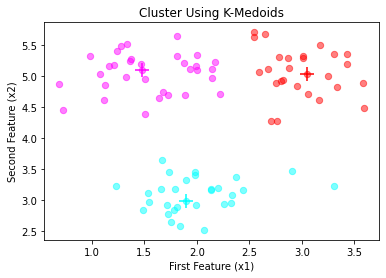

The loss of K-Medoids is: 40.3199905709484


In [13]:
from sklearn_extra.cluster import KMedoids

dataset=readCSV()

# Same process as before but using scikit-learn-extra API
# For more information, please check: https://scikit-learn-extra.readthedocs.io/en/stable/generated/sklearn_extra.cluster.KMedoids.html
model=KMedoids(n_clusters=3).fit(dataset)

# Manually calculate the loss and form the cluster
loss=calculateLoss(dataset, model.cluster_centers_, model.labels_)
cluster=formCluster(dataset, model.labels_, K=3)

plotKMeans(cluster, model.cluster_centers_, "Cluster Using K-Medoids")
print(f"The loss of K-Medoids is: {loss}")

### 8. Summary
1. Clustering is a type of problem to group points that are similar to each other in some characteristics, which is a specific example of unsupervised learning algorithms.

2. K-Means is a very easy but efficient clustering algorithm when solving single-clustering problem. The main steps are:

    (1) Choose K.

    (2) Randomly initialise the starting representative point for each cluster.

    (3) Assign each data point to the corresponding cluster depending on the distance.

    (4) For every cluster, update the new representative point.

    (5) Repeat step 3 and 4 until the end condition is met. 

3. There are also some limitations of native K-Means algorithms:

    (1) Different K choice will significantly affect the final performance and we have to choose K manually.

    (2) Different initial representative point will give a different result. (You could try this by yourself by running the above cell for several times!)

    (3) The calculation of mean is strongly influenced by the outliers so the performance will dramatically drop if there are some outliers within the dataset.

    (4) This algorithm could only assign every point to exactly one cluster, which is not suitable for multi-clustering problem.

4. To get a better performance, you might want to try:

    (1) Use "elbow" method to find the best possible K.

    (2) Try running the native algorithm for several time and choose the best result.

    (3) Use K-Means++ algorithm if its performance is better.

    (4) Use K-Medoids algorithm if its performance is better.
    